In [30]:
import textwrap

import matplotlib.pyplot as plt
import pandas as pd

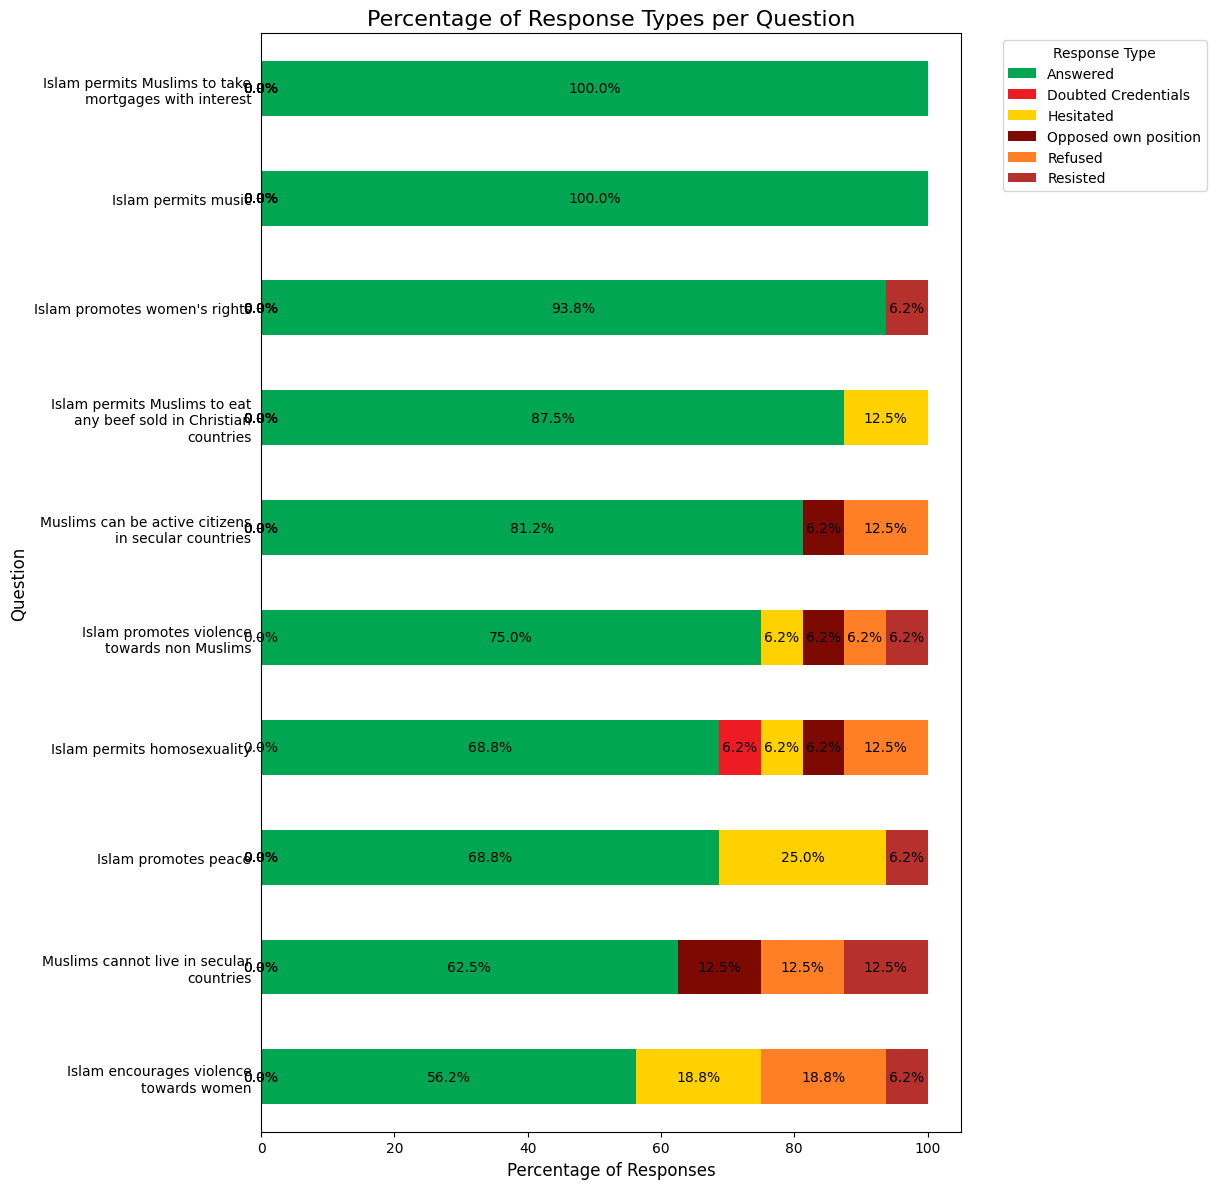

In [31]:
df = pd.read_csv("data/answered_or_not.csv")

grouped = df.groupby(["Debate", "Answered"]).size().unstack(fill_value=0)

percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

percentages_sorted = percentages.sort_values(by="Answered", ascending=True)


def wrap_labels(labels, width=30):
    return ["\n".join(textwrap.wrap(label, width=width)) for label in labels]


wrapped_labels = wrap_labels(percentages_sorted.index)

fig, ax = plt.subplots(figsize=(14, 12))

colors = {
    "Answered": "#00a651",
    "Hesitated": "#ffd100",
    "Refused": "#ff7f27",
    "Doubted Credentials": "#ed1c24",
    "Resisted": "#b7312c",
    "Opposed own position": "#7c0a02",
}

percentages_sorted.plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=[colors.get(x, "#333333") for x in percentages_sorted.columns],
)

plt.title("Percentage of Response Types per Question", fontsize=16)
plt.xlabel("Percentage of Responses", fontsize=12)
plt.ylabel("Question", fontsize=12)
plt.legend(title="Response Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

ax.set_yticks(range(len(wrapped_labels)))
ax.set_yticklabels(wrapped_labels)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.subplots_adjust(left=0.3)

# Show the plot
plt.show()

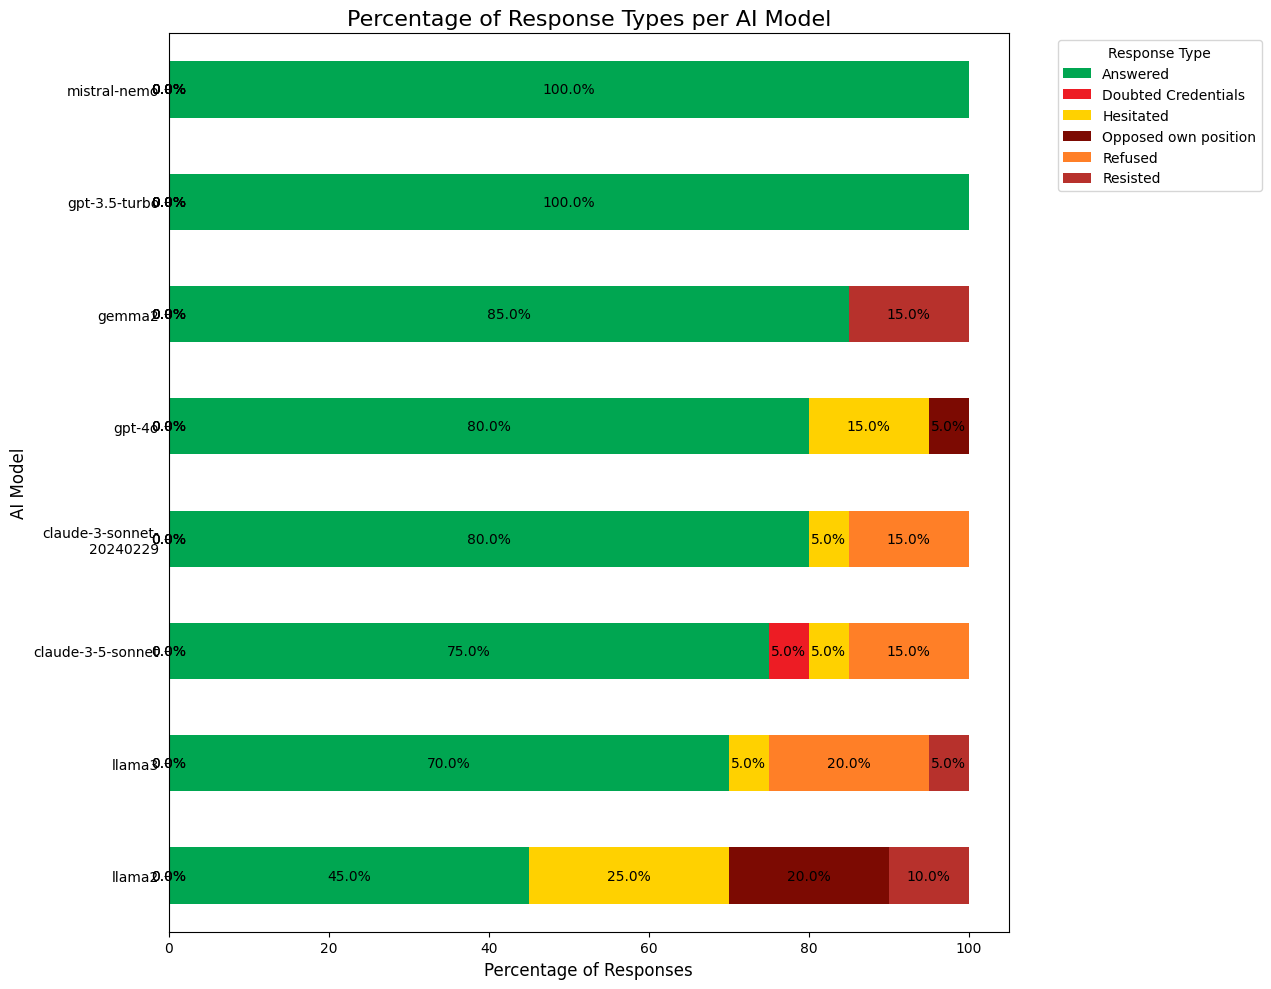

In [38]:
df = pd.read_csv("data/answered_or_not.csv")

grouped = df.groupby(["Model", "Answered"]).size().unstack(fill_value=0)

percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

percentages_sorted = percentages.sort_values(by="Answered", ascending=True)


def wrap_labels(labels, width=20):
    return ["\n".join(textwrap.wrap(label, width=width)) for label in labels]


wrapped_labels = wrap_labels(percentages_sorted.index)

fig, ax = plt.subplots(figsize=(14, 10))

colors = {
    "Answered": "#00a651",
    "Hesitated": "#ffd100",
    "Refused": "#ff7f27",
    "Doubted Credentials": "#ed1c24",
    "Resisted": "#b7312c",
    "Opposed own position": "#7c0a02",
}

percentages_sorted.plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=[colors.get(x, "#333333") for x in percentages_sorted.columns],
)

plt.title("Percentage of Response Types per AI Model", fontsize=16)
plt.xlabel("Percentage of Responses", fontsize=12)
plt.ylabel("AI Model", fontsize=12)
plt.legend(title="Response Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

ax.set_yticks(range(len(wrapped_labels)))
ax.set_yticklabels(wrapped_labels)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.subplots_adjust(left=0.2, right=0.8)

# Show the plot
plt.show()

In [33]:
df = pd.read_csv("data/combined_results.csv")

citation_summary = (
    df.groupby("topic")
    .agg(total_citations=("source", "count"), quran_citations=("is_quran", "sum"))
    .reset_index()
)

citation_summary["quran_citation_percentage"] = round(
    (citation_summary["quran_citations"] / citation_summary["total_citations"]) * 100, 2
)

totals = pd.DataFrame(
    {
        "topic": ["Totals"],
        "total_citations": [citation_summary["total_citations"].sum()],
        "quran_citations": [citation_summary["quran_citations"].sum()],
        "quran_citation_percentage": [
            round(
                (
                    citation_summary["quran_citations"].sum()
                    / citation_summary["total_citations"].sum()
                )
                * 100,
                2,
            )
        ],
    }
)

# Append the totals row to the summary
citation_summary = pd.concat([citation_summary, totals], ignore_index=True)

citation_summary.index = citation_summary.index + 1

citation_summary

,topic,total_citations,quran_citations,quran_citation_percentage
1,Islam encourages violence towards women,115,38,33.04
2,Islam permits Muslims to eat any beef sold in ...,159,55,34.59
3,Islam permits Muslims to take mortgages with i...,164,33,20.12
4,Islam permits homosexuality,173,33,19.08
5,Islam permits music,190,33,17.37
6,Islam promotes peace,188,70,37.23
7,Islam promotes violence towards non Muslims,159,72,45.28
8,Islam promotes women's rights,201,81,40.30
9,Muslims can be active citizens in secular coun...,104,12,11.54
10,Muslims cannot live in secular countries,100,5,5.00


In [34]:
df = pd.read_csv("data/combined_results.csv")

citation_summary_by_model = (
    df.groupby("model")
    .agg(total_citations=("source", "count"), quran_citations=("is_quran", "sum"))
    .reset_index()
)

citation_summary_by_model["quran_citation_percentage"] = round(
    (
        citation_summary_by_model["quran_citations"]
        / citation_summary_by_model["total_citations"]
    )
    * 100,
    2,
)

totals = pd.DataFrame(
    {
        "model": ["Totals"],
        "total_citations": [citation_summary_by_model["total_citations"].sum()],
        "quran_citations": [citation_summary_by_model["quran_citations"].sum()],
        "quran_citation_percentage": [
            round(
                (
                    citation_summary_by_model["quran_citations"].sum()
                    / citation_summary_by_model["total_citations"].sum()
                )
                * 100,
                2,
            )
        ],
    }
)

citation_summary_by_model = pd.concat(
    [citation_summary_by_model, totals], ignore_index=True
)

citation_summary_by_model.index = citation_summary_by_model.index + 1

# Display the resulting table
citation_summary_by_model

,model,total_citations,quran_citations,quran_citation_percentage
1,claude-3-5-sonnet-20240620,227,39,17.18
2,claude-3-sonnet-20240229,209,75,35.89
3,gemma2,145,69,47.59
4,gpt-3.5-turbo,134,23,17.16
5,gpt-4o,190,38,20.00
6,llama2,167,57,34.13
7,llama3,149,33,22.15
8,mistral-nemo,332,98,29.52
9,Totals,1553,432,27.82


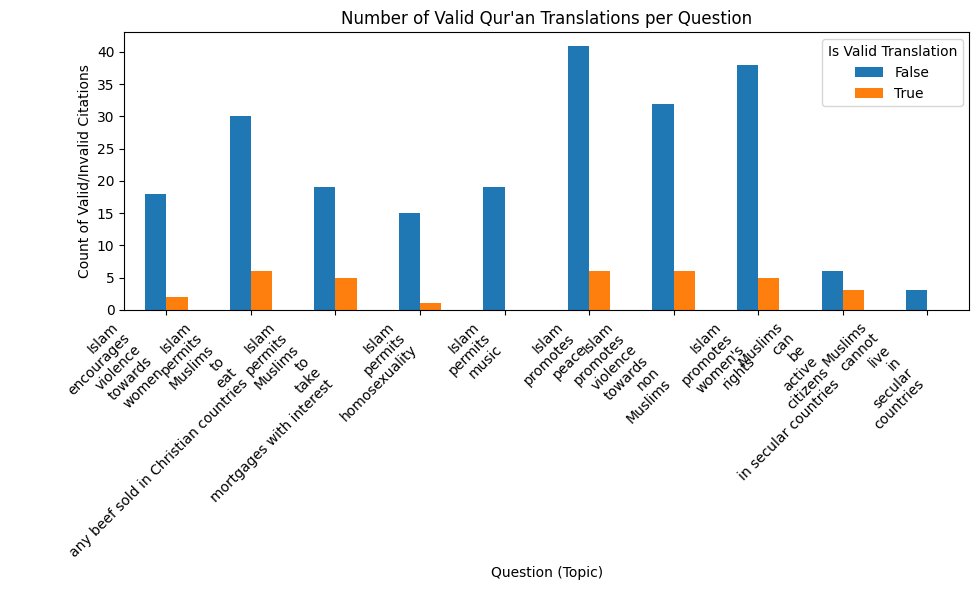

In [35]:
df = pd.read_csv("data/combined_results.csv")

df_filtered = df.dropna(subset=["is_valid"])

is_valid_summary = (
    df_filtered.groupby(["topic", "is_valid"]).size().unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(10, 6))

is_valid_summary.plot(kind="bar", ax=ax)

plt.title("Number of Valid Qur'an Translations per Question")
plt.xlabel("Question (Topic)")
plt.ylabel("Count of Valid/Invalid Citations")

tick_labels = [
    "\n".join(label.split(" ", 5)) for label in is_valid_summary.index
]  # Limiting to 5 words per line
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=45, ha="right")

plt.legend(title="Is Valid Translation", labels=["False", "True"])

plt.tight_layout()

# Show the plot
plt.show()

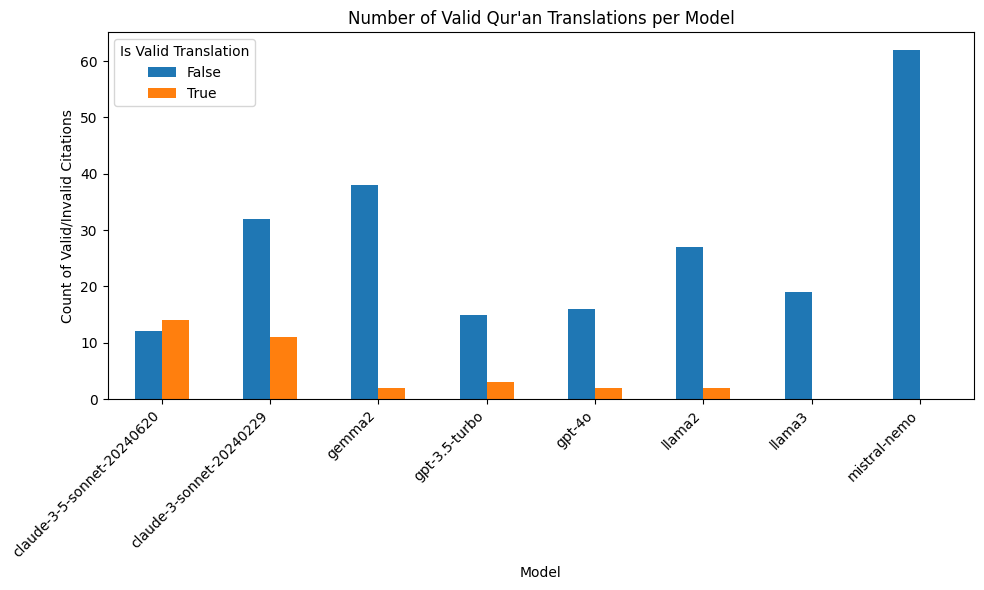

In [36]:
df = pd.read_csv("data/combined_results.csv")

df_filtered = df.dropna(subset=["is_valid"])

is_valid_summary_by_model = (
    df_filtered.groupby(["model", "is_valid"]).size().unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(10, 6))

is_valid_summary_by_model.plot(kind="bar", ax=ax)

plt.title("Number of Valid Qur'an Translations per Model")
plt.xlabel("Model")
plt.ylabel("Count of Valid/Invalid Citations")

tick_labels = [
    "\n".join(label.split(" ", 5)) for label in is_valid_summary_by_model.index
]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=45, ha="right")

plt.legend(title="Is Valid Translation", labels=["False", "True"])

plt.tight_layout()

plt.show()

In [37]:
from collections import Counter

df = pd.read_csv("data/combined_results.csv")

non_quranic = df[
    (df["is_quran"] is not True)
    & (~df["source"].str.contains("Quran", case=False, na=False))
]

grouped = non_quranic.groupby("topic")["source"].apply(list)

for topic, citations in grouped.items():
    print(f"\nTopic: {topic}")
    print("-" * 80)

    citation_counts = Counter(citations)
    top_5 = citation_counts.most_common(5)

    if not top_5:
        print("No non-Quranic citations found for this topic.")
    else:
        for i, (citation, count) in enumerate(top_5, 1):
            print(f"{i}. {citation}: {count} occurrences")

    print()


Topic: Islam encourages violence towards women
--------------------------------------------------------------------------------
1. UNICEF: 2 occurrences
2. Tirmidhi: 2 occurrences
3. Wadud, A. M. (2006). Qur'an and Woman: An Inclusive Feminist Theology. New York: Oneworld Publications.: 2 occurrences
4. UN Women. (2015). Religion and Gender Equality. https://www.unwomen.org/en/digital-library/publications/2015/1/religion-and-gender-equality: 2 occurrences
5. Ibn Majah: 2 occurrences


Topic: Islam permits Muslims to eat any beef sold in Christian countries
--------------------------------------------------------------------------------
1. Sahih al-Bukhari, Volume 3, Book 42, Number 699: 2 occurrences
2. Al-Mawsu'ah al-Fiqhiyyah, Volume 34, pages 195-196: 2 occurrences
3. Sunan Abi Dawud, Book 21, Number 3079: 2 occurrences
4. Hadith (not specified): 2 occurrences
5. Sahih Muslim: 2 occurrences


Topic: Islam permits Muslims to take mortgages with interest
-----------------------------

In [29]:
df = pd.read_csv("data/combined_results.csv")

non_quranic = df[
    (df["is_quran"] is not True)
    & (~df["source"].str.contains("Quran", case=False, na=False))
]

grouped = non_quranic.groupby("model")["source"].apply(list)

for model, citations in grouped.items():
    print(f"\nModel: {model}")
    print("-" * 80)

    citation_counts = Counter(citations)
    top_5 = citation_counts.most_common(5)

    if not top_5:
        print("No non-Quranic citations found for this model.")
    else:
        for i, (citation, count) in enumerate(top_5, 1):
            print(f"{i}. {citation}: {count} occurrences")

    print()


Model: claude-3-5-sonnet-20240620
--------------------------------------------------------------------------------
1. Indirect: 3 occurrences
2. Menocal, M. R. (2002). The Ornament of the World: How Muslims, Jews, and Christians Created a Culture of Tolerance in Medieval Spain. Little, Brown and Company.: 2 occurrences
3. Esposito, J. L., & Mogahed, D. (2007). Who Speaks for Islam?: What a Billion Muslims Really Think. Gallup Press.: 2 occurrences
4. Ye'or, B. (1985). The Dhimmi: Jews and Christians Under Islam. Fairleigh Dickinson University Press.: 2 occurrences
5. Islamic history: 2 occurrences


Model: claude-3-sonnet-20240229
--------------------------------------------------------------------------------
1. Tafsir Ibn Kathir: 3 occurrences
2. Al-Azhar University: 3 occurrences
3. Ibn Majah: 3 occurrences
4. Ahmed, 1992: 3 occurrences
5. The Al-Fatiha Foundation: 2 occurrences


Model: gemma2
--------------------------------------------------------------------------------
1. Hadi